# Autoencoder for MNIST Compression and Latent Space Visualization
---
이 노트북에서는 MNIST 데이터셋을 Autoencoder로 학습하여 압축된 특징(latent space)을 추출하고 이를 시각화합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.manifold import TSNE

## 1. 데이터 준비

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


## 2. Autoencoder 모델 정의

In [3]:
latent_dim = 64

# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Flatten()(input_img)
x = layers.Dense(128, activation="relu")(x)
latent = layers.Dense(latent_dim, activation="relu")(x)

# Decoder
x = layers.Dense(128, activation="relu")(latent)
x = layers.Dense(28*28, activation="sigmoid")(x)
decoded = layers.Reshape((28, 28, 1))(x)

autoencoder = models.Model(input_img, decoded)
encoder = models.Model(input_img, latent)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

## 3. 모델 학습

In [4]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.2215 - val_loss: 0.1430
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1265 - val_loss: 0.1126
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1079 - val_loss: 0.1015
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0994 - val_loss: 0.0950
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0945 - val_loss: 0.0913
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0913 - val_loss: 0.0888
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0888 - val_loss: 0.0870
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0869 - val_loss: 0.0850
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0852 - val_loss: 0.0838
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0839 - val_loss: 0.0823


## 4. Latent Space 추출

In [5]:
latent_vectors = encoder.predict(x_test)
print("Latent vectors shape:", latent_vectors.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Latent vectors shape: (10000, 64)


## 5. Latent Space 시각화 (t-SNE)

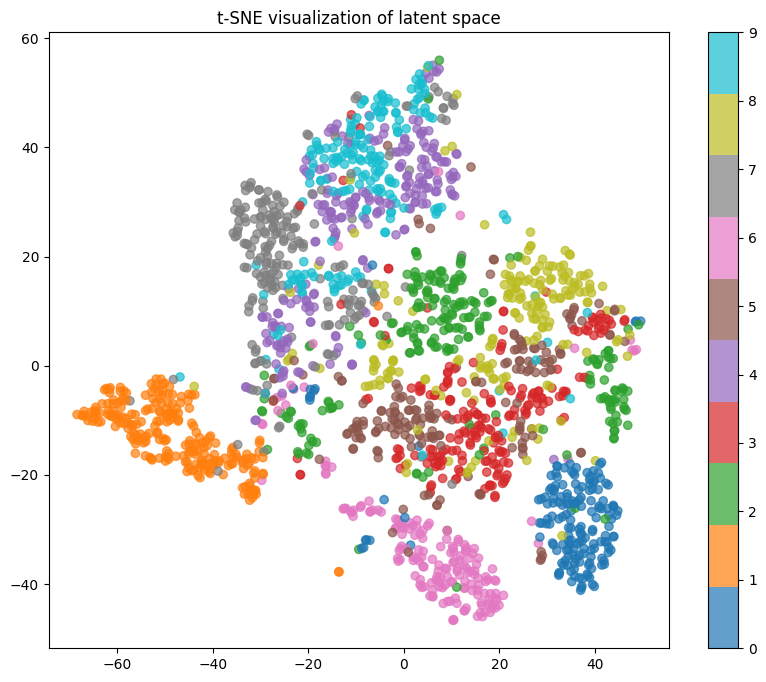

In [6]:
tsne = TSNE(n_components=2, random_state=42)
latent_tsne = tsne.fit_transform(latent_vectors[:2000])  # 일부 샘플만 사용

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_tsne[:,0], latent_tsne[:,1], c=y_test[:2000], cmap="tab10", alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE visualization of latent space")
plt.show()

## 6. 원본 이미지와 재구성 이미지 비교

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


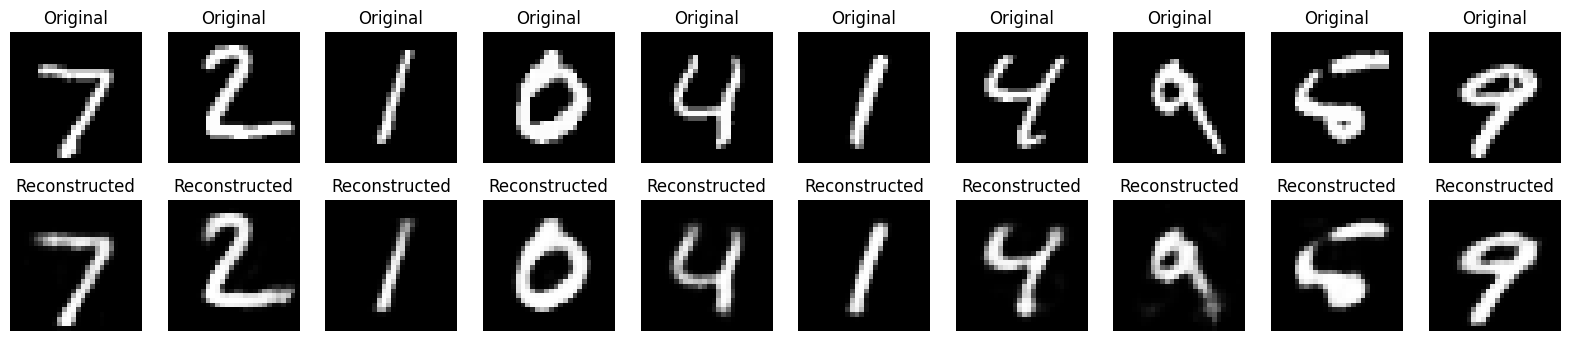

In [7]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # 재구성
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()